Question 7

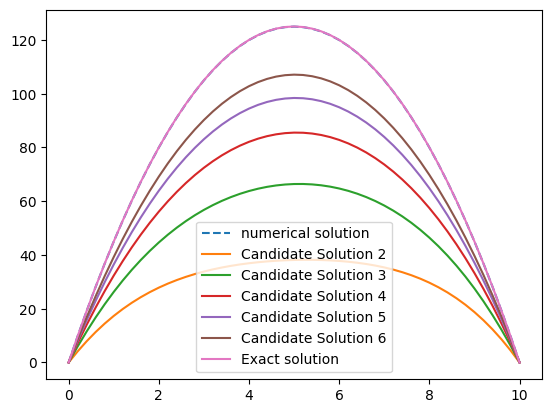

In [12]:
import numpy as np
import matplotlib.pyplot as plt


def f1(t, x, v):
    return v

def f2(t, x, v):
    return -10
def exact(t):
    return(-5*(-10 + t)*t)
def relaxation_method(t0,tf,x0,xf,h,iterations):
    n=int((tf-t0)/h)
    t=np.linspace(t0,tf,n+1)
    x=np.zeros(len(t))
    x[0]=x0
    x[-1]=xf
    for j in range (iterations):
        for i in range (1,len(x)-1):
            x[i] = 0.5* (x[i-1]+x[i+1] - f2(t,x,(x[i+1]-x[i-1])/2)*(h**2))
    return(t,x)


    
    
x0,xf=0,0
t0,tf=0,10
h=0.2
iterations=2000
# Numerical Solution
t_val,x_val = relaxation_method (t0,tf,x0,xf,h,iterations)
plt.plot(t_val,x_val,label='numerical solution', linestyle='--')

# Candidate Solution
num_cand=5
for m in range(1,num_cand+1):
    itr =m*100
    t_cand,x_cand= relaxation_method(t0,tf,x0,xf,h,itr)
    plt.plot(t_cand,x_cand,label=f'Candidate Solution {m+1}')

# Exact solution
plt.plot(t_val,exact(t_val),label='Exact solution')
plt.legend()
plt.show()

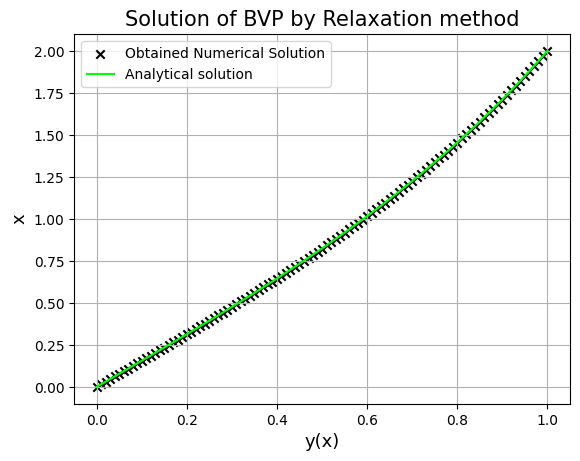

Point Index	True Value				Computed					Error					percentage
	 1 	 0.015514778930207982 	 0.015510553157418333 	 0.0002723708026171443 	 0.02723708026171443 %
	 2 	 0.03103176384551941 	 0.031023310536099632 	 0.0002724082801692592 	 0.027240828016925917 %
	 3 	 0.046553161613461194 	 0.046540477238995376 	 0.0002724707415392943 	 0.027247074153929428 %
	 4 	 0.062081180866760136 	 0.062064260132786715 	 0.00027255818489883404 	 0.027255818489883402 %
	 5 	 0.07761803288682545 	 0.07759686873063117 	 0.000272670607681377 	 0.0272670607681377 %
	 6 	 0.09316593248829083 	 0.09314051607596789 	 0.00027280800657616304 	 0.027280800657616303 %
	 7 	 0.10872709890496984 	 0.10869741962773499 	 0.0002729703775209829 	 0.02729703775209829 %
	 8 	 0.12430375667757906 	 0.12426980214735318 	 0.0002731577156911803 	 0.02731577156911803 %
	 9 	 0.13989813654358393 	 0.13985989258783033 	 0.0002733700154876185 	 0.02733700154876185 %
	 10 	 0.15551247632952364 	 0.15546992698534262 	 0.000273607270

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
# Range of values
a = 0.0 
b = 1.0
# Boundary Values
y_a = 0.0
y_b = 2.0
n = 99 # Number of solution points 
h = (b-a)/(n+1)
x = np.delete(np.arange(a,b,h),0) # this creates the time mesh points between a and b, i.e excluding a and b
def y(x): # True Solution
    return np.exp(2.0)*(np.exp(4.0)-1)**-1.0*(np.exp(2.0*x)-np.exp(-2.0*x))+x

def q(x): 
    return 4.0
def g(x):
    return 4.0*x

def Create_A(x):
    sup = -1.0*np.ones(len(x)-1,dtype = np.float64)
    sub = -1.0*np.ones(len(x)-1,dtype = np.float64)
    dig = np.zeros(len(x),dtype = np.float64)
    dig[:] = 2.0+q(x[:])*h**2.0
    A = diags((sub,dig,sup),offsets=(-1,0,1),shape=(len(x),len(x)),dtype=np.float64)
    A = A.toarray()*(1/h**2.0) # Converting sparse to Array
    return A
def create_k(x):
    k = np.zeros(len(x),dtype = np.float64)
    k[1:len(x)-2] = g(x[1:len(x)-2])
    k[0] = g(x[0])+y_a/h**2.0
    k[len(x)-1] = g(x[len(x)-1]) + y_b/h**2.0
    return k
# Creating the Two matrices
A = Create_A(x)
k = create_k(x)
sol = np.linalg.solve(A,k) # This does not include the boundaries
# Here we put the boundaries one by one : putting left
x_full = np.insert(x,0,a)
sol = np.insert(sol,0,y_a)
# Putting Right
x_full = np.insert(x_full,len(x_full),b)
sol = np.insert(sol,len(sol),y_b)

#PLotting the Computed Solution Vs The true Solution for 101 points

plt.title("Solution of BVP by Relaxation method",size = 15)
plt.scatter(x_full,sol,marker = 'x',color = 'black',label = "Obtained Numerical Solution")
plt.plot(np.linspace(a,b,1000),y(np.linspace(a,b,1000)),color = '#00FF00',label = "Analytical solution")
plt.grid()
plt.xlabel("y(x)",size = 13)
plt.ylabel("x",size = 13)
plt.legend()
plt.show()

'''
Calculating Error
==================================
Since the error occurs only in the inbetween computed points, we're gonna
compare them only.

err = |y_true - y_comp|/y_true

Each point will have a relative error percentage that we will quote.
FInally we will quote the average error percentage with a variance.
''' 
err = np.zeros(n,dtype = np.float64)
print("Point Index\tTrue Value\t\t\t\tComputed\t\t\t\t\tError\t\t\t\t\tpercentage")
for i in range(n):
	err[i] = np.abs(y(x[i]) - sol[i+1])/y(x[i])
	print("\t",(i+1),"\t",y(x[i]),"\t",sol[i+1],"\t",err[i],"\t",100.0*err[i],"%")
print("mean error percent = ",np.mean(err)*100.0,"%")
print("variance = ",np.var(err)*100.0,"%")

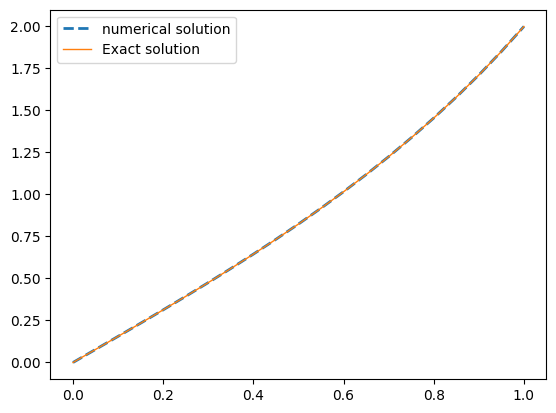

In [43]:
import numpy as np
import matplotlib.pyplot as plt


def f1(t, x, v):
    return v

def f2(t, x, v):
    return 4*(x-t)
def exact(t):
    return np.exp(2.0)*(np.exp(4.0)-1)**-1.0*(np.exp(2.0*t)-np.exp(-2.0*t))+t
def relaxation_method(t0,tf,x0,xf,h,iterations):
    n=int((tf-t0)/h)
    t=np.linspace(t0,tf,n+1)
    x=np.zeros(len(t))
    x[0]=x0
    x[-1]=xf
    for j in range (iterations):
        for i in range (1,len(x)-1):
            x[i] = 0.5* (x[i-1]+x[i+1] - f2(t[i],x[i],(x[i+1]-x[i-1])/2)*(h**2))
    return(t,x)


    
    
x0,xf=0,2
t0,tf=0,1
h=0.05
iterations=2000
# Numerical Solution
t_val,x_val = relaxation_method (t0,tf,x0,xf,h,iterations)
plt.plot(t_val,x_val,label='numerical solution', linestyle='--',linewidth='2')

# # Candidate Solution
# num_cand=5
# for m in range(1,num_cand+1):
#     itr =m*100
#     t_cand,x_cand= relaxation_method(t0,tf,x0,xf,h,itr)
#     plt.plot(t_cand,x_cand,'o',label=f'Candidate Solution {m+1}')

# Exact solution
plt.plot(t_val,exact(t_val),'-',label='Exact solution',linewidth='1')
plt.legend()
plt.show()

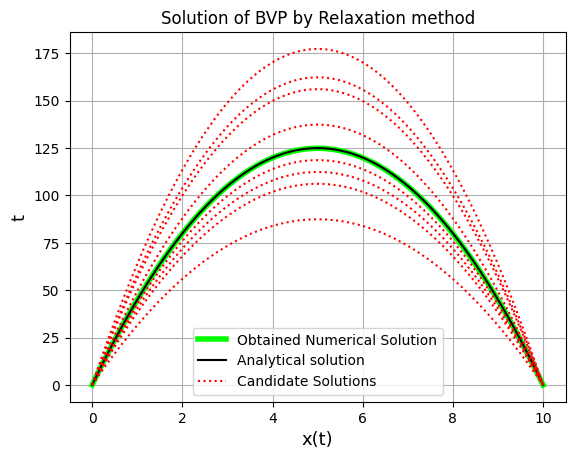

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
a = 0.0
b = 10.0
g_val = 10.0
x_a = x_b = 0.0 # Boundary Values
n = 99 
h = (b-a)/(n+1)
t = np.delete(np.arange(a,b,h),0) # this creates the time mesh points between a and b
def x(t): # True Solution
    return 0.5*g_val*(t*b - t**2.0)

def q(x): #This step is unnecessary but upholds the generality of the problem at hand.
    return 0.0
def g(x):
    return g_val

def Create_A(t):
    sup = -1.0*np.ones(len(t)-1,dtype = np.float64)
    sub = -1.0*np.ones(len(t)-1,dtype = np.float64)
    dig = np.zeros(len(t),dtype = np.float64)
    dig[:] = 2.0+q(t[:])*h**2.0
    A = diags((sub,dig,sup),offsets=(-1,0,1),shape=(len(t),len(t)),dtype=np.float64)
    A = A.toarray()*(1/h**2.0)
    return A
def create_k(t):
    k = np.zeros(len(t),dtype = np.float64)
    k[1:len(t)-2] = g(t[1:len(t)-2])
    k[0] = g(t[0])+x_a/h**2.0
    k[len(t)-1] = g(t[len(t)-1]) + x_b/h**2.0
    return k
# Creating the Two matrices
A = Create_A(t)
k = create_k(t)
true_sol = np.linalg.solve(A,k)
t_full = np.insert(t,0,a)
true_sol = np.insert(true_sol,0,x_a)
t_full = np.insert(t_full,len(t_full),b)
true_sol = np.insert(true_sol,len(true_sol),x_b)
x_cand_sol = np.zeros(shape = len(true_sol),dtype = np.float64)
x_cand_sol[0] = x_a
x_cand_sol[len(true_sol)-1] = x_b
val = [9.0,11.0,12.5,8.5,7.0,13.0,9.5,14.2]
plt.title("Solution of BVP by Relaxation method")
plt.plot(t_full,true_sol,color = '#00FF00',lw = 4,label = "Obtained Numerical Solution")
plt.plot(np.linspace(a,b,1000),x(np.linspace(a,b,1000)),color = '#000000',label = "Analytical solution")
for i in range(len(val)):
    g_val = val[i]
    A = Create_A(t)
    k = create_k(t)
    x_cand_sol[1:n+1] = np.copy(np.linalg.solve(A,k))
    if(i==0):
        plt.plot(t_full,x_cand_sol,':',color = 'red',label = "Candidate Solutions")
    else:
         plt.plot(t_full,x_cand_sol,':',color = 'red')       
    g_val = 10.0
plt.grid()
plt.xlabel("x(t)",size = 13)
plt.ylabel("t",size = 13)
plt.legend()
plt.show()